## 텐서플로우 Layer별 역할

### CNN
- Feature extraction 부분과 classificatino 으로 나뉨
- Filters : layer에서 나갈 때 몇 개의 filter를 만들 것인지
- kernel_size : filter의 사이즈
- strides : 몇 개의 pixel을 skip 하면서 훑어나갈 것인지
- padding : zero padding만들것인지, valid는 no padding / same은 padding

### Convloution Layer 통과시키기

In [44]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import datasets

(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [24]:
# img  float 형으로 변환
img = train_x[0]
img = tf.cast(img, dtype = tf.float32)
print(img.dtype)
print(img.shape)

# img 차원늘려주기
img = img[tf.newaxis, ..., tf.newaxis]
print(img.shape)

# layer

<dtype: 'float32'>
(28, 28)
(1, 28, 28, 1)


In [30]:
# Conv layer 1개 만들고 통과시키기
layer = tf.keras.layers.Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='Same')
print(layer)

output = layer(img)
print(output.shape)


(1, 28, 28, 3)


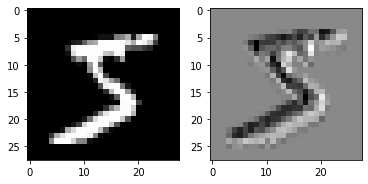

In [31]:
# 왼쪽 그림이 오른쪽 그림으로 변한 것
plt.subplot(1,2,1)
plt.imshow(img[0, :, :, 0], 'gray')

plt.subplot(1,2,2)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

## Weight 불러오기


In [32]:
# weight 불러 올시 list 형 반환 - list[0] : weight / list[1] : bias
weight = layer.get_weights()
print(len(weight)) 
print(weight[0].shape, weight[1].shape)

2
(3, 3, 1, 3) (3,)


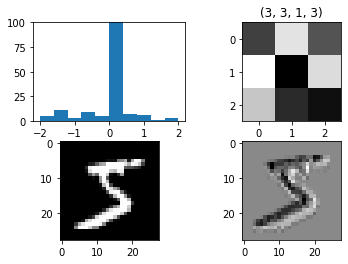

In [40]:
# 왼쪽 그림이 오른쪽 그림으로 변한 것
# histogram
plt.subplot(221)
plt.hist(output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

# 가중치파일들
plt.subplot(222)
plt.title(weight[0].shape) # 가중치 
plt.imshow(weight[0][:,:,0,0], 'gray')

# conv 연산 전 그림
plt.subplot(2,2,3)
plt.imshow(img[0, :, :, 0], 'gray')

# conv 연산 후 그림
plt.subplot(2,2,4)
plt.imshow(output[0, :, :, 0], 'gray')
plt.show()

## Relu 함수 적용 전후 비교

In [46]:
## Relu 함수 적용되었을 떄
# activaton 적용 전
print(np.min(output), np.max(output))

# activation 적용 후
act_layer = tf.keras.layers.ReLU()
act_output = act_layer(output)

print(np.min(act_output), np.max(act_output))

-286.54202 148.1598
0.0 148.1598


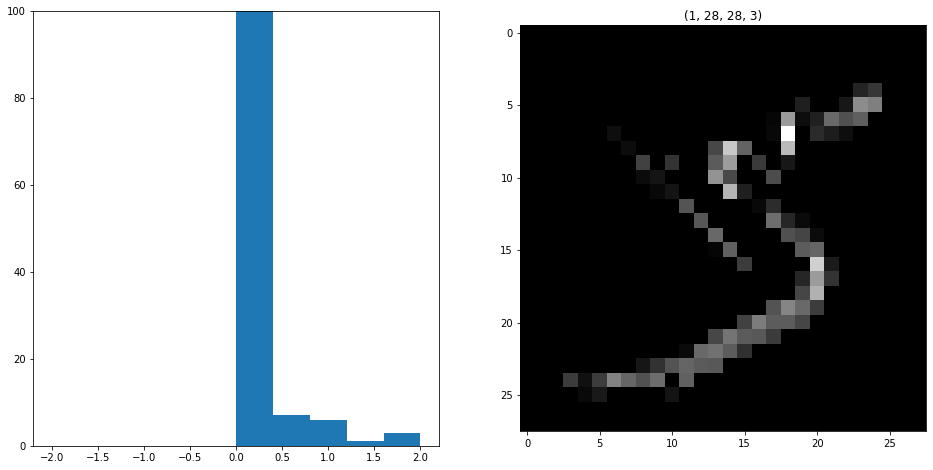

In [51]:
# 왼쪽 그림이 오른쪽 그림으로 변한 것
# histogram
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

# 가중치파일들
plt.subplot(122)
plt.title(act_output.shape) # 가중치 
plt.imshow(act_output[0,:,:,0], 'gray')
plt.show()

# 0이상이 되는 숫자들만 살아남은 것

## Pooling 적용 전 후 비교
- 이미지를 반으로 줄여가면서 강조되는 것들만 살려냄
- 일반적으로 pooling 은 2x2를 씀

In [52]:
# pooling layer 통과 전
pool_layer = tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='SAME')
print(act_output.shape)

# pooling layer 통과 후
pool_output = pool_layer(act_output)
print(pool_output.shape)

(1, 28, 28, 3)
(1, 14, 14, 3)


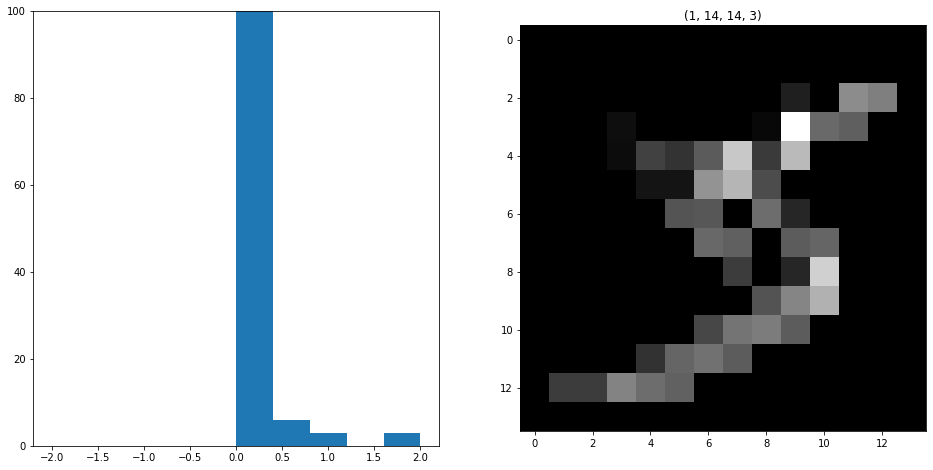

In [53]:
# 왼쪽 그림이 오른쪽 그림으로 변한 것
# histogram
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.hist(pool_output.numpy().ravel(), range=[-2, 2])
plt.ylim(0, 100)

# 가중치파일들
plt.subplot(122)
plt.title(pool_output.shape) # 가중치 
plt.imshow(pool_output[0,:,:,0], 'gray')
plt.show()

# 0이상이 되는 숫자들만 살아남은 것